## This session is a primer for Softmax / Logistic Regression
Logistic regression is a simple classification algorithm for learning to predict binary labels. Softmax Regression is the generalized form of logistic regression. 

![](./images/logistic_regression_schematic.png)

Logistic regression learns weights so as to maximize the likelihood of the data.

In [16]:
from IPython.display import Latex
from IPython.display import Math
import sys
import numpy
import matplotlib.pyplot as plt

## Sigmoid Function

![](./images/sigmoid.png)

The function is often called the “sigmoid” or “logistic” function – it is an S-shaped function that “squashes” the value of θ⊤x into the range 0..1 so that we may interpret our classes as a probability

In [17]:
def sigmoid(x):
    return 1. / (1 + numpy.exp(-x))

## Softmax regression
Softmax Regression (also called multinomial logistic regression) is a generalized form of logistic regression. 
![](./images/Softmax_Classifier.png)


In Softmax Regression (SMR), we simply replace the sigmoid logistic function by the so-called softmax function $\phi_{softmax}(\cdot)$.

In [6]:
def softmax(x):
    e = numpy.exp(x - numpy.max(x))  # prevent overflow
    if e.ndim == 1:
        return e / numpy.sum(e, axis=0)
    else:  
        return e / numpy.array([numpy.sum(e, axis=1)]).T  # ndim = 2

## Logistic Regression Class

#### Regularization Equation
![](./images/regularization.png)
#### Gradient Descent (Log-Likelihood)
Formula for the gradient of the log-likelihood with respect to the kth weight is
![](./images/gd_loglikelihood.png)

![](./images/reg.png)



In [13]:
class LogisticRegression(object):
    def __init__(self, input, label, n_in, n_out):
        self.x = input
        self.y = label
        self.Weights = numpy.zeros((n_in, n_out))  # initialize W 0
        self.biases = numpy.zeros(n_out)          # initialize bias 0

        # self.params = [self.Weights, self.biases]

    def train(self, lr=0.1, input=None, L2_regularization=0.00):
        if input is not None:
            self.x = input

        # p_y_given_x = sigmoid(numpy.dot(self.x, self.Weights) + self.biases)
        p_y_given_x = softmax(numpy.dot(self.x, self.Weights) + self.biases)
        d_y = self.y - p_y_given_x
        
        self.Weights += lr * numpy.dot(self.x.T, d_y) 
        - lr * L2_regularization * self.Weights
        self.biases += lr * numpy.mean(d_y, axis=0)
        
        # cost = self.negative_log_likelihood()
        # return cost

    def negative_log_likelihood(self):
        # sigmoid_activation = sigmoid(numpy.dot(self.x, self.Weights) + self.biases)
        sigmoid_activation = softmax(numpy.dot(self.x, self.Weights) + self.biases)

        cross_entropy = - numpy.mean(
            numpy.sum(self.y * numpy.log(sigmoid_activation) +
            (1 - self.y) * numpy.log(1 - sigmoid_activation),
                      axis=1))

        return cross_entropy


    def predict(self, x):
        # return sigmoid(numpy.dot(x, self.Weights) + self.biases)
        return softmax(numpy.dot(x, self.Weights) + self.biases)

## Test Run
Now we will do a testing run using randomly generated data

In [32]:
costlist=list()
def test_lr(learning_rate=0.01, n_epochs=2000):
    # training data
    x = numpy.array([[1,1,1,0,0,0],
                     [1,0,1,0,0,0],
                     [1,1,1,0,0,0],
                     [0,0,1,1,1,0],
                     [0,0,1,1,0,0],
                     [0,0,1,1,1,0]])
    y = numpy.array([[1, 0],
                     [1, 0],
                     [1, 0],
                     [0, 1],
                     [0, 1],
                     [0, 1]])


    # construct LogisticRegression
    classifier = LogisticRegression(input=x, label=y, n_in=6, n_out=2)

    # train
    for epoch in range(n_epochs):
        classifier.train(lr=learning_rate)
        cost = classifier.negative_log_likelihood()
        costlist.append(cost)
        print ( 'Training epoch %d, cost is ' % epoch, cost)
        #learning_rate *= 0.95


    # test
    x = numpy.array([1, 1, 0, 0, 0, 0])
    print ( classifier.predict(x))

In [33]:
if __name__ == "__main__":
    test_lr()

Training epoch 0, cost is  1.34345264825
Training epoch 1, cost is  1.30253223461
Training epoch 2, cost is  1.26344408435
Training epoch 3, cost is  1.22610164444
Training epoch 4, cost is  1.19042108737
Training epoch 5, cost is  1.15632149447
Training epoch 6, cost is  1.12372498618
Training epoch 7, cost is  1.0925568058
Training epoch 8, cost is  1.06274536273
Training epoch 9, cost is  1.03422224134
Training epoch 10, cost is  1.00692218067
Training epoch 11, cost is  0.980783030239
Training epoch 12, cost is  0.955745686177
Training epoch 13, cost is  0.931754011976
Training epoch 14, cost is  0.908754747158
Training epoch 15, cost is  0.886697407036
Training epoch 16, cost is  0.865534176131
Training epoch 17, cost is  0.8452197975
Training epoch 18, cost is  0.825711459816
Training epoch 19, cost is  0.806968683761
Training epoch 20, cost is  0.788953208981
Training epoch 21, cost is  0.771628882632
Training epoch 22, cost is  0.754961550313
Training epoch 23, cost is  0.73891

Training epoch 508, cost is  0.059241454147
Training epoch 509, cost is  0.0591291790586
Training epoch 510, cost is  0.059017331046
Training epoch 511, cost is  0.0589059076742
Training epoch 512, cost is  0.0587949065266
Training epoch 513, cost is  0.0586843252047
Training epoch 514, cost is  0.0585741613285
Training epoch 515, cost is  0.0584644125356
Training epoch 516, cost is  0.0583550764816
Training epoch 517, cost is  0.0582461508397
Training epoch 518, cost is  0.0581376333005
Training epoch 519, cost is  0.058029521572
Training epoch 520, cost is  0.0579218133792
Training epoch 521, cost is  0.0578145064642
Training epoch 522, cost is  0.0577075985858
Training epoch 523, cost is  0.0576010875195
Training epoch 524, cost is  0.0574949710573
Training epoch 525, cost is  0.0573892470077
Training epoch 526, cost is  0.0572839131952
Training epoch 527, cost is  0.0571789674605
Training epoch 528, cost is  0.05707440766
Training epoch 529, cost is  0.0569702316661
Training epoch 

Training epoch 1147, cost is  0.026841315764
Training epoch 1148, cost is  0.0268184554276
Training epoch 1149, cost is  0.0267956342295
Training epoch 1150, cost is  0.0267728520691
Training epoch 1151, cost is  0.0267501088461
Training epoch 1152, cost is  0.0267274044605
Training epoch 1153, cost is  0.0267047388127
Training epoch 1154, cost is  0.0266821118035
Training epoch 1155, cost is  0.026659523334
Training epoch 1156, cost is  0.0266369733055
Training epoch 1157, cost is  0.0266144616199
Training epoch 1158, cost is  0.0265919881793
Training epoch 1159, cost is  0.026569552886
Training epoch 1160, cost is  0.0265471556428
Training epoch 1161, cost is  0.0265247963528
Training epoch 1162, cost is  0.0265024749195
Training epoch 1163, cost is  0.0264801912465
Training epoch 1164, cost is  0.0264579452379
Training epoch 1165, cost is  0.0264357367982
Training epoch 1166, cost is  0.0264135658321
Training epoch 1167, cost is  0.0263914322445
Training epoch 1168, cost is  0.02636

Training epoch 1825, cost is  0.0170284575399
Training epoch 1826, cost is  0.0170193031237
Training epoch 1827, cost is  0.0170101586019
Training epoch 1828, cost is  0.0170010239585
Training epoch 1829, cost is  0.0169918991774
Training epoch 1830, cost is  0.0169827842426
Training epoch 1831, cost is  0.0169736791382
Training epoch 1832, cost is  0.0169645838483
Training epoch 1833, cost is  0.0169554983568
Training epoch 1834, cost is  0.0169464226481
Training epoch 1835, cost is  0.0169373567062
Training epoch 1836, cost is  0.0169283005154
Training epoch 1837, cost is  0.01691925406
Training epoch 1838, cost is  0.0169102173241
Training epoch 1839, cost is  0.0169011902921
Training epoch 1840, cost is  0.0168921729483
Training epoch 1841, cost is  0.0168831652772
Training epoch 1842, cost is  0.0168741672631
Training epoch 1843, cost is  0.0168651788905
Training epoch 1844, cost is  0.0168562001439
Training epoch 1845, cost is  0.0168472310077
Training epoch 1846, cost is  0.0168

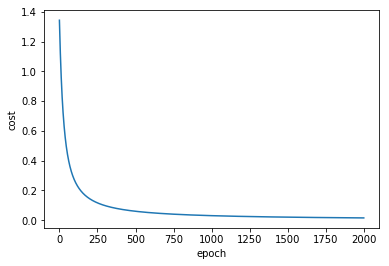

In [34]:
plt.plot(costlist)
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show()